In [1]:
from matplotlib import pyplot as plt

from egamma_tnp import get_and_compute_tnp_histograms
from egamma_tnp.utils import get_events, get_ratio_histograms

In [2]:
plt.rcParams.update(
    {
        "text.usetex": True,
        "font.family": "serif",
        "font.serif": ["Palatino"],
        "xtick.labelsize": 18,
        "ytick.labelsize": 18,
        "legend.numpoints": 1,
        "axes.linewidth": 2,
        "legend.title_fontsize": 16,
        "axes.labelsize": 18,
        "legend.fontsize": 16,
    }
)

In [3]:
%%time
events = get_events(["root_files/Egamma0.root", "root_files/Egamma1.root"])

CPU times: user 809 ms, sys: 218 ms, total: 1.03 s
Wall time: 836 ms


In [4]:
%%time

(
    hpt_all,
    hpt_pass,
    heta_all,
    heta_pass,
    habseta_all,
    habseta_pass,
) = get_and_compute_tnp_histograms(events)

hptratio, hetaratio, habsetaratio = get_ratio_histograms(
    hpt_all, hpt_pass, heta_all, heta_pass, habseta_all, habseta_pass
)

print(f"Passing probes: {hpt_pass.sum(flow=True)}")
print(f"All probes: {hpt_all.sum(flow=True)}")

[########################################] | 100% Completed | 210.88 ms
[########################################] | 100% Completed | 3.15 ss
Passing probes: 14598.0
All probes: 16896.0
CPU times: user 5.45 s, sys: 201 ms, total: 5.65 s
Wall time: 4.34 s


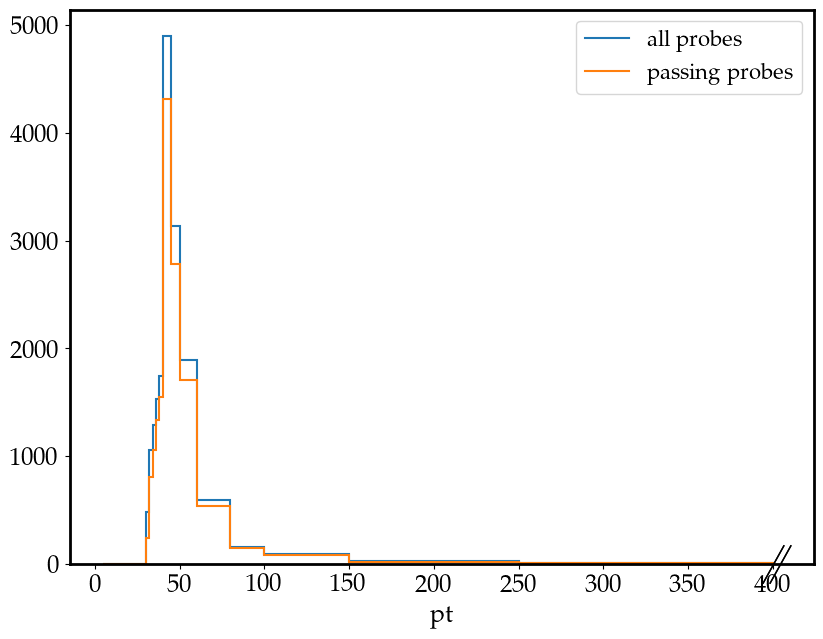

In [5]:
plt.figure(figsize=(6.4 * 1.5, 4.8 * 1.5))
hpt_all.plot1d(label="all probes")
hpt_pass.plot1d(label="passing probes")
plt.legend()
plt.savefig("plots/pt.pdf", bbox_inches="tight")
plt.show()

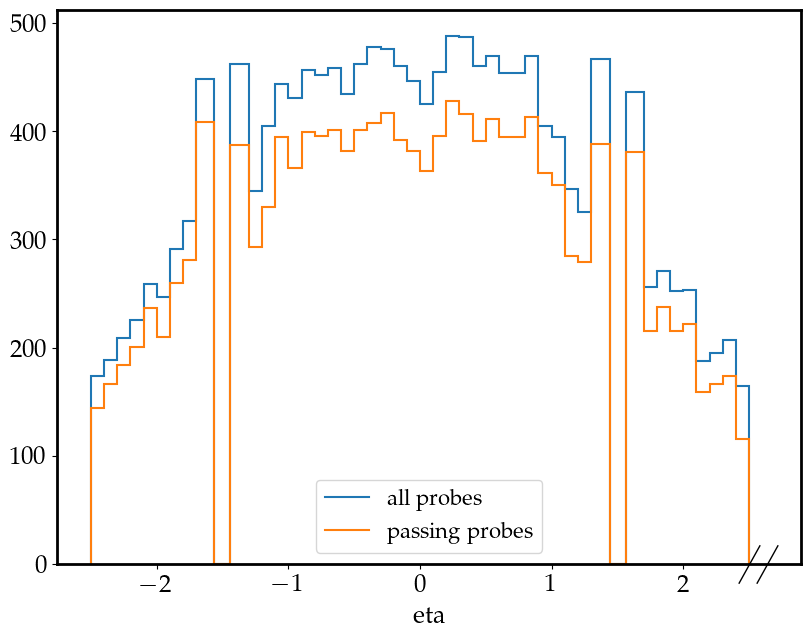

In [6]:
plt.figure(figsize=(6.4 * 1.5, 4.8 * 1.5))
heta_all.plot1d(label="all probes")
heta_pass.plot1d(label="passing probes")
plt.legend()
plt.savefig("plots/eta.pdf", bbox_inches="tight")
plt.show()

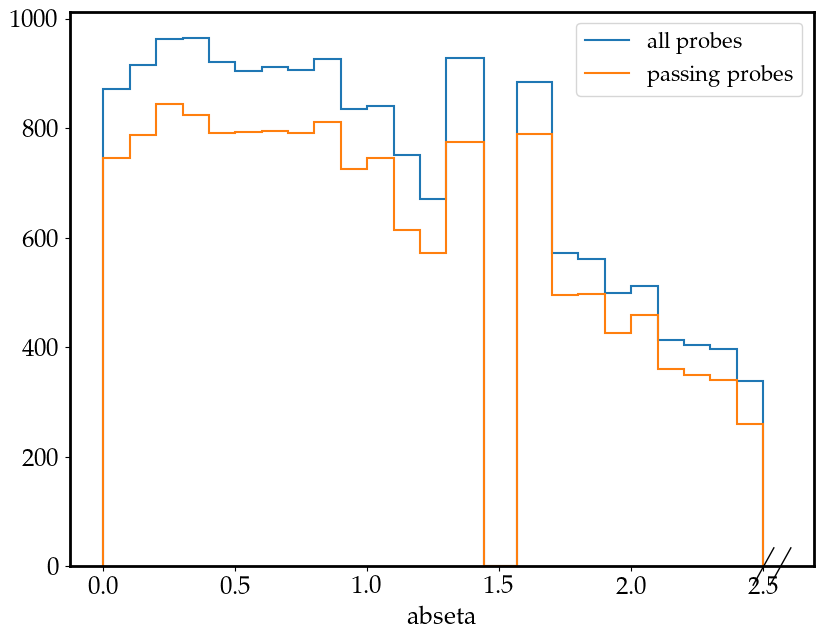

In [7]:
plt.figure(figsize=(6.4 * 1.5, 4.8 * 1.5))
habseta_all.plot1d(label="all probes")
habseta_pass.plot1d(label="passing probes")
plt.legend()
plt.savefig("plots/abseta.pdf", bbox_inches="tight")
plt.show()

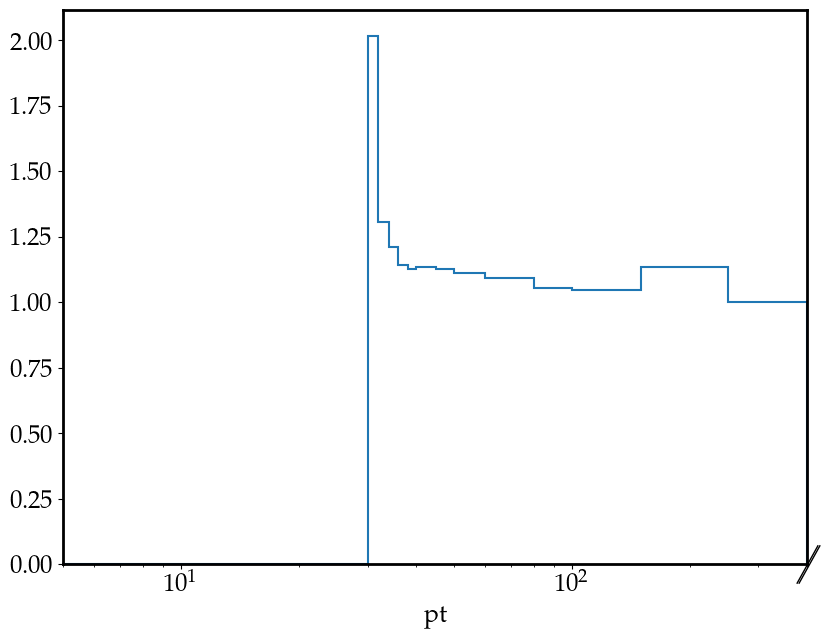

In [8]:
plt.figure(figsize=(6.4 * 1.5, 4.8 * 1.5))
hptratio.plot1d()
plt.xlim(5, 400)
plt.xscale("log")
plt.savefig("plots/eff_pt.pdf", bbox_inches="tight")
plt.show()

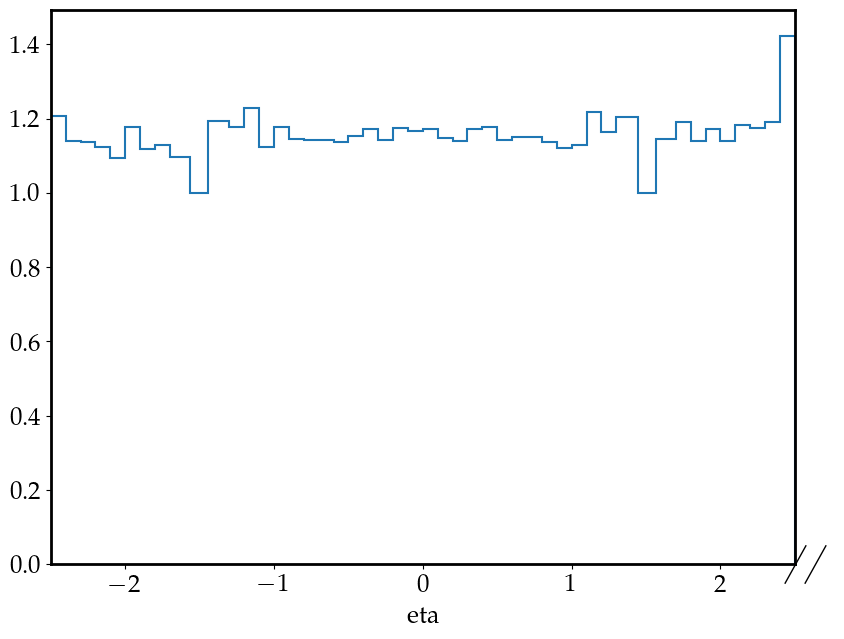

In [9]:
plt.figure(figsize=(6.4 * 1.5, 4.8 * 1.5))
hetaratio.plot1d()
plt.xlim(-2.5, 2.5)
plt.savefig("plots/eff_eta.pdf", bbox_inches="tight")
plt.show()

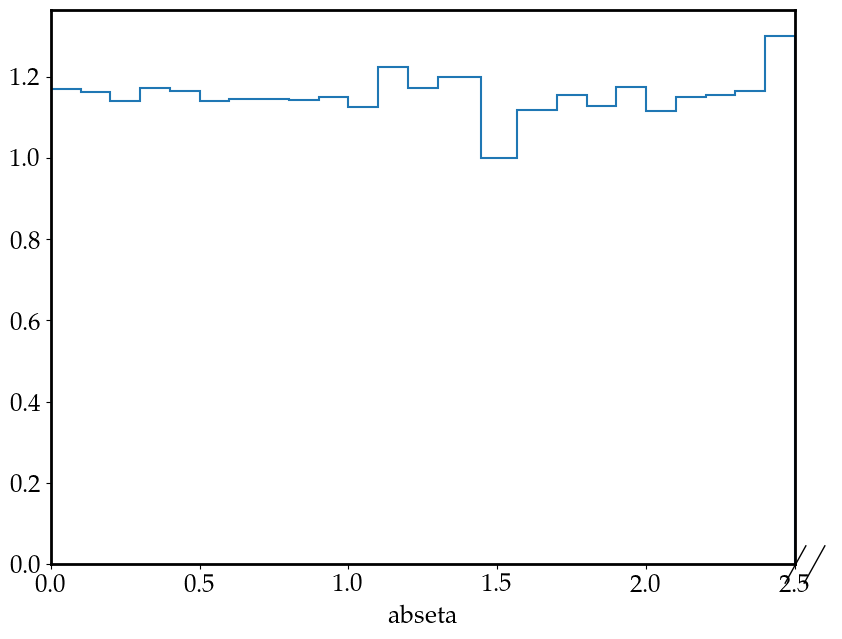

In [10]:
plt.figure(figsize=(6.4 * 1.5, 4.8 * 1.5))
habsetaratio.plot1d()
plt.xlim(0, 2.5)
plt.savefig("plots/eff_abseta.pdf", bbox_inches="tight")
plt.show()